In [34]:
import string
import csv
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
from statistics import mode
from scipy.stats import norm
from scipy.stats import pearsonr
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import chi2_contingency
import statsmodels.api as sm



In [3]:
#Loading the dataset CSV file
movies = pd.read_csv("C:/Users/VP/Desktop/IMDB-Movie-Data.csv")

In [4]:
movies

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [5]:
# column names
list(movies.columns)

['Rank',
 'Title',
 'Genre',
 'Description',
 'Director',
 'Actors',
 'Year',
 'Runtime (Minutes)',
 'Rating',
 'Votes',
 'Revenue (Millions)',
 'Metascore']

In [6]:
#Renmaing the columns
movies.rename(columns={'Revenue (Millions)':"Revenue", "Runtime (Minutes)":"Runtime"}, inplace=True)
print(movies.columns)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')


In [7]:
# column data types
print(movies.dtypes)

Rank             int64
Title           object
Genre           object
Description     object
Director        object
Actors          object
Year             int64
Runtime          int64
Rating         float64
Votes            int64
Revenue        float64
Metascore      float64
dtype: object


In [8]:
#checking if the data has N/A's, null values etc
movies.isnull().values.any()

True

In [9]:
#Checking to see how many null values, NA's, blank cells are there there in the data
movies.isnull().sum()

Rank             0
Title            0
Genre            0
Description      0
Director         0
Actors           0
Year             0
Runtime          0
Rating           0
Votes            0
Revenue        128
Metascore       64
dtype: int64

In [10]:
# Clean movie dataset
moviesclean= movies.dropna()
moviesclean

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [11]:
#Re-checking if the data has N/A's, null values left 
moviesclean.isnull().values.any()

False

In [12]:
#Re-checking to see how mnay null values, NA's, blank cells are there there in the data
moviesclean.isnull().sum()

Rank           0
Title          0
Genre          0
Description    0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
dtype: int64

In [13]:
moviesclean.isnull().values.any()

False

In [15]:
# The 5 variables I chose are:
#Revenue - Amount of money the movie has made in millions
#Rating - User rating of the movie - scale ranges from 0-10
#Year - The year the movie has released
#Runtime - The duration of the movie in minutes
#Metascore - aggreated average critic scores which ranges from 0-100. Higher scores represents positive reviews and lower scores represents negative reviews

(array([582., 149.,  56.,  33.,  11.,   3.,   2.,   0.,   1.,   1.]),
 array([  0.   ,  93.663, 187.326, 280.989, 374.652, 468.315, 561.978,
        655.641, 749.304, 842.967, 936.63 ]),
 <a list of 10 Patch objects>)

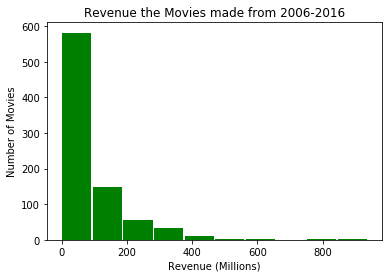

In [16]:
# Revenue (millions) column histogram
plt.xlabel('Revenue (Millions)')
plt.ylabel('Number of Movies')
plt.title('Revenue the Movies made from 2006-2016')
plt.hist(moviesclean.Revenue, rwidth=0.95, color='green')


(array([  1.,   1.,   3.,  10.,  37., 118., 246., 243., 161.,  18.]),
 array([1.9 , 2.61, 3.32, 4.03, 4.74, 5.45, 6.16, 6.87, 7.58, 8.29, 9.  ]),
 <a list of 10 Patch objects>)

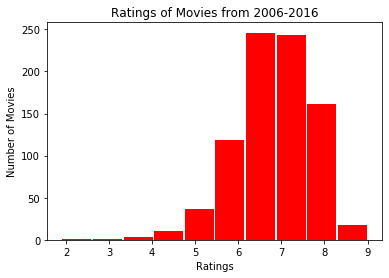

In [17]:
# Rating column histogram
plt.xlabel('Ratings')
plt.ylabel('Number of Movies')
plt.title('Ratings of Movies from 2006-2016')
plt.hist(moviesclean.Rating, rwidth=0.95, color='red')

(array([ 41.,  44.,  48.,  45.,  57.,  57.,  62.,  84.,  93., 307.]),
 array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015., 2016.]),
 <a list of 10 Patch objects>)

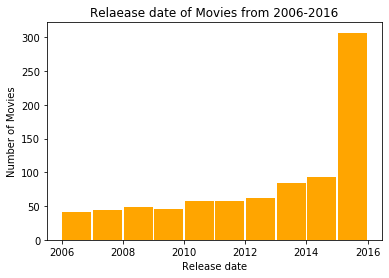

In [18]:
# Year column histogram
plt.xlabel('Release date')
plt.ylabel('Number of Movies')
plt.title('Relaease date of Movies from 2006-2016')
plt.hist(moviesclean.Year, rwidth=0.95, color='orange')

(array([  1.,  47., 196., 213., 194.,  93.,  51.,  27.,  13.,   3.]),
 array([ 66. ,  78.1,  90.2, 102.3, 114.4, 126.5, 138.6, 150.7, 162.8,
        174.9, 187. ]),
 <a list of 10 Patch objects>)

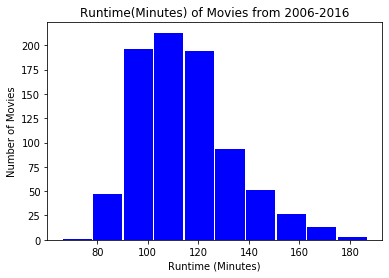

In [19]:
# Runtime column histogram
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Number of Movies')
plt.title('Runtime(Minutes) of Movies from 2006-2016')
plt.hist(moviesclean.Runtime, rwidth=0.95, color='blue')

(array([  6.,  21.,  90., 125., 170., 176., 140.,  87.,  23.]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 9 Patch objects>)

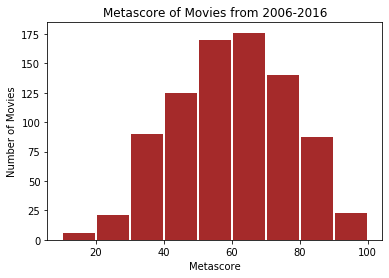

In [20]:
# Metascore column histogram
plt.xlabel('Metascore')
plt.ylabel('Number of Movies')
plt.title('Metascore of Movies from 2006-2016')
plt.hist(moviesclean.Metascore, bins=[10,20,30,40,50,60,70,80,90,100], rwidth=0.95, color='brown')

In [30]:
#Mean of the 5 variables
print('Average Revenue (millions):', np.mean(moviesclean.Revenue))
print('Average Rating:', np.mean(moviesclean.Rating))
print('Average Year:', np.mean(moviesclean.Year))
print('Average Runtime (minutes):', np.mean(moviesclean.Runtime))
print('Average Metascore:', np.mean(moviesclean.Metascore))

Average Revenue (millions): 84.56455847255368
Average Rating: 6.8143198090692145
Average Year: 2012.5071599045345
Average Runtime (minutes): 114.63842482100239
Average Metascore: 59.575178997613364


In [39]:
#Spread of the 5 variables
print('Spread of Revenue (millions):', np.var(moviesclean.Revenue))
print('Spread of Ratings:', np.var(moviesclean.Rating))
print('Spread of Year:', np.var(moviesclean.Year))
print('Spread of Runtime:', np.var(moviesclean.Runtime))
print('Spread of Metascore:', np.var(moviesclean.Metascore))

Spread of Revenue (millions): 10911.441384948243
Spread of Ratings: 0.7695324132352873
Spread of Year: 10.05185804364302
Spread of Runtime: 340.7678314090261
Spread of Metascore: 287.0414841565045


In [25]:
#Probabiltiy Mass function using the Ratings column
movies1 = moviesclean.assign(rating_highlow = lambda v: v.Rating.apply (lambda Rating: 'High' if Rating>=7.0 else 'Low'))
movies1

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,rating_highlow
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,High
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,High
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,High
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,High
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0,Low
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0,Low
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,Low
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,Low


In [22]:
#Putting Rating column into a dataframe
df = pd.DataFrame(movies1.Rating)
df

,Rating
0,8.1
1,7.0
2,7.3
3,7.2
4,6.2
...,...
993,5.9
994,6.7
996,5.5
997,6.2


In [23]:
# deriving the probability for the Ratings
df["pmf"] = df["Rating"]/ df["Rating"].sum()

In [28]:
df

,Rating,pmf
0,8.1,0.001418
1,7.0,0.001226
2,7.3,0.001278
3,7.2,0.001261
4,6.2,0.001086
...,...,...
993,5.9,0.001033
994,6.7,0.001173
996,5.5,0.000963
997,6.2,0.001086


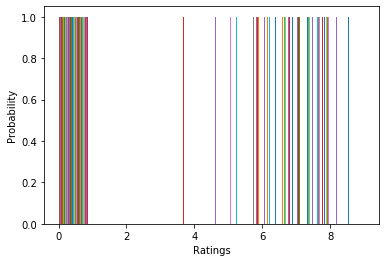

In [29]:
# Histogram fro probability mass function
plt.xlabel('Ratings')
plt.ylabel('Probability')
plt.hist(df, rwidth=0.95)
plt.show()

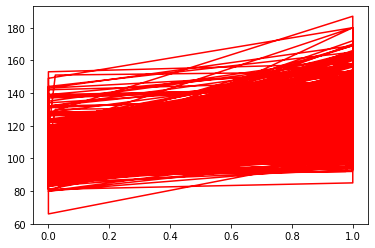

In [50]:
# Exponential Analytical Distribution
df1= movies1.Runtime
diffs = df1.diff()
cdf = norm.cdf(diffs)

plt.plot(cdf, df1,'r')
plt.xlabel=("minutes")
plt.ylabel=("CDF")
plt.show()



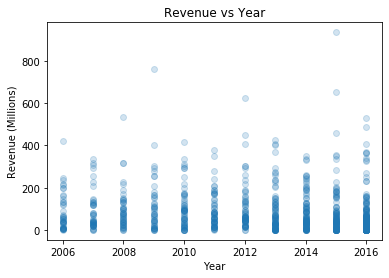

In [22]:
#Scatterplot for Revenue and Year
plt.scatter(movies1.Year, movies1.Revenue, alpha = 0.2)

plt.xlabel("Year")
plt.ylabel("Revenue (Millions)")
plt.title("Revenue vs Year")
plt.show()


In [41]:
#Pearson Correlation for Revenue vs Year
y = movies1[['Revenue', 'Year']]

corr1 = y.corr()
corr1 


,Revenue,Year
Revenue,1.000000,-0.129198
Year,-0.129198,1.000000


In [39]:
#Covriance for Revenue vs Year
y.cov()

,Revenue,Year
Revenue,10924.477755,-42.838898
Year,-42.838898,10.063867


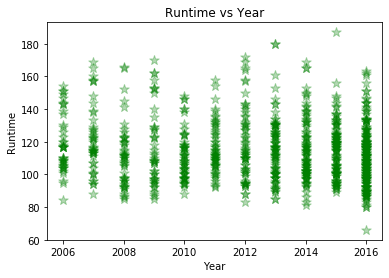

In [44]:
#Scatterplot for Year and Runtime
plt.scatter(movies1.Year, movies1.Runtime, alpha = 0.3, color='g', marker="*", s=100)

plt.xlabel=('Year')
plt.ylabel=('Runtime')
plt.title=('Runtime vs Year')
plt.show()



In [45]:
#Pearson correlation for Rating vs Year
x = movies1[['Runtime', 'Year']]

corr = x.corr()
corr

,Runtime,Year
Runtime,1.000000,-0.101933
Year,-0.101933,1.000000


In [46]:
#Covriance for Rating vs Year
x.cov()

,Runtime,Year
Runtime,341.174961,-5.972916
Year,-5.972916,10.063867


In [18]:
#Correlation between all the variables
corr2 = movies1.corr()
print(corr2)

               Rank      Year   Runtime    Rating     Votes   Revenue  \
Rank       1.000000 -0.312809 -0.254783 -0.243125 -0.303284 -0.273170   
Year      -0.312809  1.000000 -0.101933 -0.145703 -0.362445 -0.129198   
Runtime   -0.254783 -0.101933  1.000000  0.374566  0.399298  0.281721   
Rating    -0.243125 -0.145703  0.374566  1.000000  0.517452  0.217106   
Votes     -0.303284 -0.362445  0.399298  0.517452  1.000000  0.636833   
Revenue   -0.273170 -0.129198  0.281721  0.217106  0.636833  1.000000   
Metascore -0.195909 -0.062303  0.221397  0.672731  0.332674  0.142397   

           Metascore  
Rank       -0.195909  
Year       -0.062303  
Runtime     0.221397  
Rating      0.672731  
Votes       0.332674  
Revenue     0.142397  
Metascore   1.000000  


In [76]:
# Hypothesis testing - I am choosing chi-squared test

table = pd.crosstab(movies1['Rating'], movies1['Year'])

chi2, p, dof, expected = chi2_contingency(table.values)

print("chi-Statistic= %s" % chi2, "p-value= %s" % p) 


chi-Statistic= 539.8974226176376 p-value= 0.05891623679039456


In [59]:
table = pd.crosstab(movies1['Revenue'], movies1['Year'])

chi2, p, dof, expected = chi2_contingency(table.values)

print("chi-Statistic= %s" % chi2, "p-value= %s" % p) 

chi-Statistic= 7976.586524297618 p-value= 0.22018767286604532


In [77]:
table = pd.crosstab(movies1['Runtime'], movies1['Year'])

chi2, p, dof, expected = chi2_contingency(table.values)

print("chi-Statistic= %s" % chi2, "p-value= %s" % p) 

chi-Statistic= 974.7037850782966 p-value= 0.02482432307791691


In [15]:
table = pd.crosstab(movies1['Metascore'], movies1['Year'])

chi2, p, dof, expected = chi2_contingency(table.values)

print("chi-Statistic= %s" % chi2, "p-value= %s" % p) 

chi-Statistic= 899.0153191879142 p-value= 0.015705245019070748


In [1]:
#Linear Regression
from sklearn import linear_model

In [191]:
#Explanatory variables
x = pd.DataFrame(np.c_[movies1['Revenue'], movies1['Rank'], movies1['Year']], columns = ['Revenue', 'Rank', 'Year'])

In [192]:
#Dependent variable
Y = movies1['Votes']

In [193]:
#Traing and Testing my model
from sklearn.model_selection import train_test_split

In [194]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5)

In [195]:
print(x_train.shape)
print(Y_train.shape)

(586, 3)
(586,)


In [196]:
print(x_test.shape)
print(Y_test.shape)

(252, 3)
(252,)


In [197]:
from sklearn.linear_model import LinearRegression

In [198]:
model = LinearRegression()

In [199]:
#fitting the model with x and Y variables
model.fit(x_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
#Model Prediction
pred = model.predict(x_test)

In [201]:
#deriving R Squared
print("R-Squared: %s" % model.score(x_test, Y_test))

R-Squared: 0.5708121990368151
